  sex    len   diam      h      ww      sw      vw     sh  rings   age
0   M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150     15  16.5
1   M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070      7   8.5
2   F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210      9  10.5
3   M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155     10  11.5
4   I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055      7   8.5
                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.552e+05
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:24:48   Log-Likelihood:                 10533.
No. Observations:                4177   AIC:                        -2.106e+04
Df Residuals:        

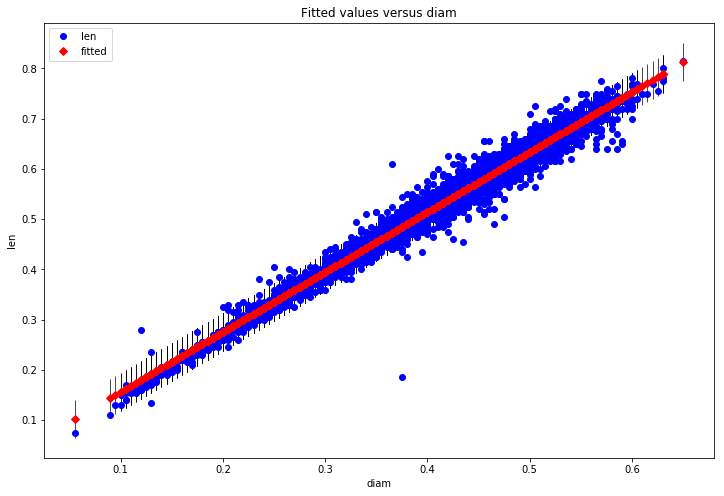

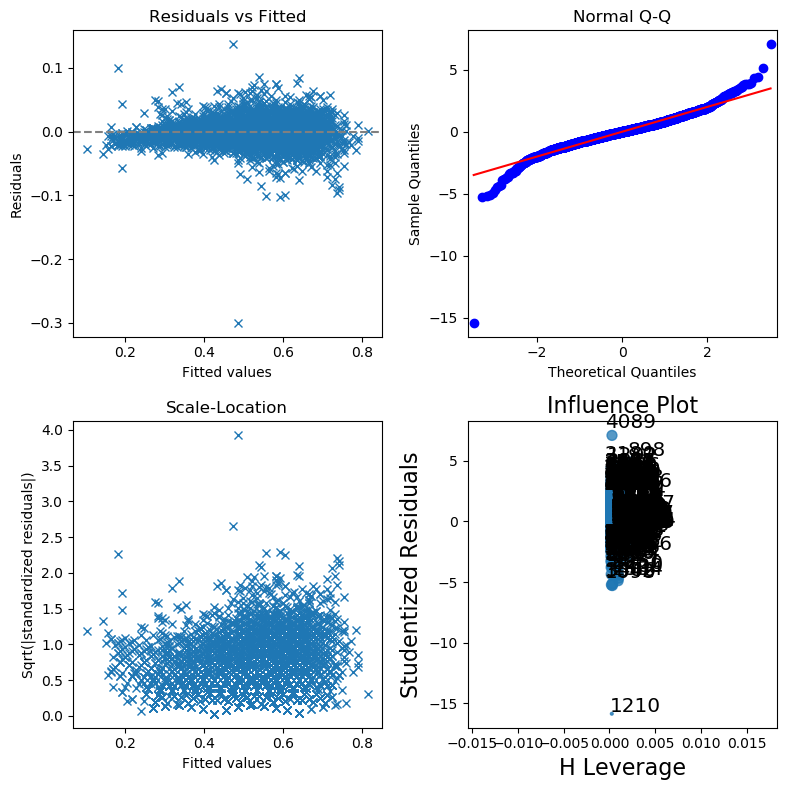

In [12]:
'''
# Preface

The goal here is to practice basic tools available in R for developing linear regression models 
with one or more variables, conduct visual and quantitative evaluation of their 
relative performance and reason about associated tradeoffs.  
We will continue working with abalone dataset and will use some of the variables 
available there to develop model of snail age.  Given the simplicity of the 
measurements available in this dataset (essentially just dimensions and masses of 
various compartments of the mollusc) and potential variability in growth rates due 
to differences in environmental conditions (e.g. location, temperature, nutrients, etc.) 
that are not captured in this dataset, we should expect substantial fraction of 
variability in abalone age to remain unexplained as part of this exercise. 
Furthermore, given strong correlations between some of the predictors in this dataset 
it is possible that only a small number of those could be justifiably used in the model 
(for the reasons related to collinearity - see Ch.3.3.3 section 6 of ISLR).

'''
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style



dataURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abaDat = pd.read_csv(dataURL,header=None)
abaDat.rename(columns={0:'sex',1:'len',2:'diam',3:'h',4:'ww',5:'sw',6:'vw',7:'sh',8:'rings'}, inplace=True)
abaDat['age'] = abaDat['rings'] + 1.5 
print(abaDat.head())

'''
Here an uninspiring example of the model of shell length and diameter is used to
illustrate R tools that will be needed for this assignment. 
Please note that by this time `abaDat` dataset has been already created 
and corresponding columns have been named `len` and `diam` 
respectively -- the variables names in your code likely will be different. 
Then a simple linear model can be fit using function `lm()` and summarized 
using `summary`:

'''
X = abaDat["diam"]
y = abaDat["len"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary());

'''
The plot of predictor and response with regression line added to it can be generated 
using standard statsmodels function plot_fit
'''
# scatter-plot data
fig, ax = plt.subplots(figsize=(12, 8));
fig = sm.graphics.plot_fit(model, "diam", ax=ax);

'''

Diagnostic plots for this model are obtained in a bit convuluted manner. In R its simple
funtion plot(lm(...)) gives us 4 plots including residual vs. fitted, Normal Q-Q, scale-location
and Residuals vs. Leverage.. howver in Python its bit of coding involved to get same 
plots. 
'''
results = pd.DataFrame({'resids': model.resid,
                        'std_resids': model.resid_pearson,
                        'fitted': model.predict()})

fig = plt.figure(figsize = (8, 8), dpi = 100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'x')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

#### qq plot 
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'x')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(model, criterion = 'Cooks', size = 2, ax = ax4)

plt.tight_layout()

'''

(with appropriate parameters) returns model predictions for the new data and 
corresponding estimates of uncertainty associated with them:

'''
# prediction on previously unseen diameters with confidence interval
new_diam =np.array([0.2,0.3,0.4,0.5])
new_diam = sm.add_constant(new_diam)
predictions = model.get_prediction(new_diam)
print(predictions.summary_frame(what='all', alpha=0.05));

### need to figure out how to  generate prediction interval.. will tackle that later. 






         len   diam      h     ww     sw     vw     sh  rings    age
len    1.000  0.987  0.828  0.925  0.898  0.903  0.898  0.557  0.557
diam   0.987  1.000  0.834  0.925  0.893  0.900  0.905  0.575  0.575
h      0.828  0.834  1.000  0.819  0.775  0.798  0.817  0.557  0.557
ww     0.925  0.925  0.819  1.000  0.969  0.966  0.955  0.540  0.540
sw     0.898  0.893  0.775  0.969  1.000  0.932  0.883  0.421  0.421
vw     0.903  0.900  0.798  0.966  0.932  1.000  0.908  0.504  0.504
sh     0.898  0.905  0.817  0.955  0.883  0.908  1.000  0.628  0.628
rings  0.557  0.575  0.557  0.540  0.421  0.504  0.628  1.000  1.000
age    0.557  0.575  0.557  0.540  0.421  0.504  0.628  1.000  1.000
         len   diam      h     ww     sw     vw     sh  rings    age
len    1.000  0.983  0.888  0.973  0.957  0.953  0.948  0.604  0.604
diam   0.983  1.000  0.896  0.971  0.950  0.948  0.954  0.623  0.623
h      0.888  0.896  1.000  0.916  0.874  0.901  0.921  0.658  0.658
ww     0.973  0.971  0.916  1.000 

'\nConfidence intervals on model parameters quantify uncertainty associated with their estimated values, \nconfidence intervals on model fit quantify uncertainty in average model fit at given level(s) of predictors,\nprediction intervals quantify variability of observed values around model fit\n'

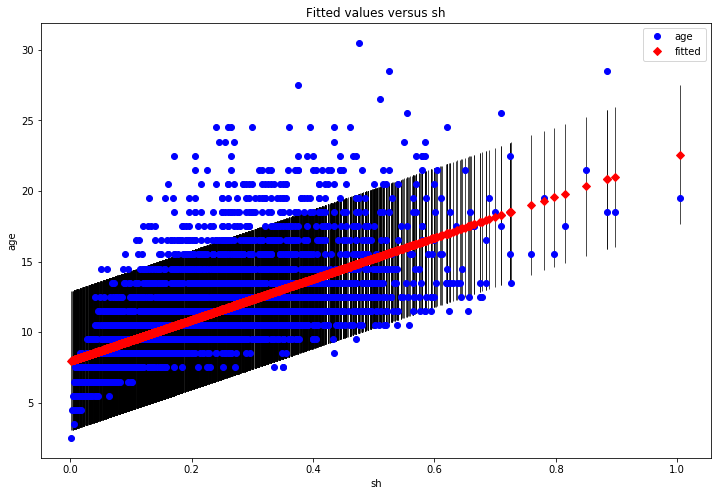

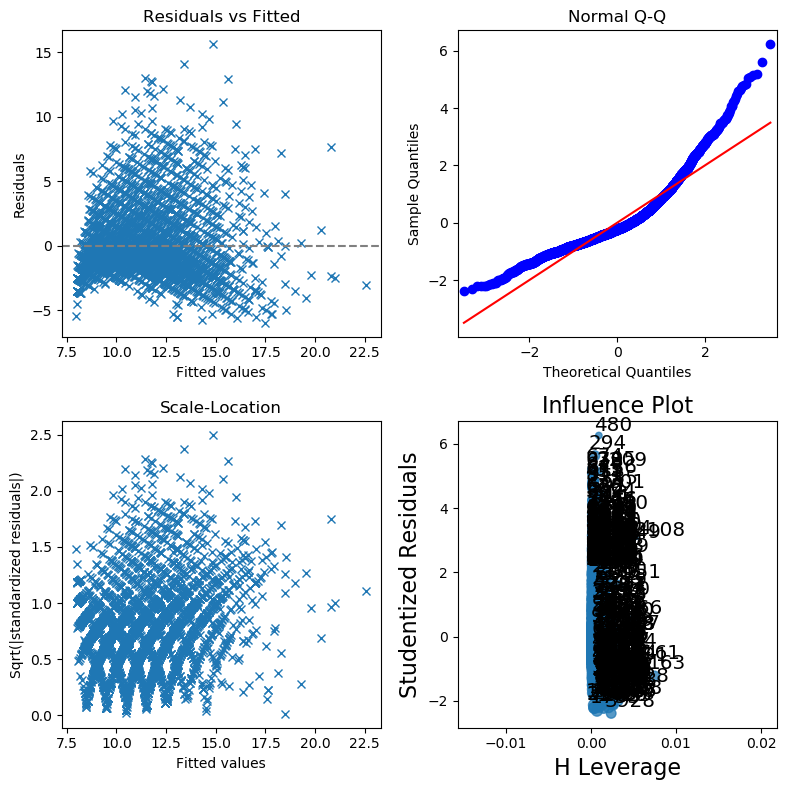

In [14]:
'''
# Problem 1: model of age and shell weight 

Here we will identify variable most correlated with the outcome (abalone age), 
build simple linear model of snail age (rings+1.5 as per dataset description) as 
function of this variable, evaluate model summary and diagnostic plots 
and assess impact of using log-transformed (instead of untransformed) 
attributes on the model peformance.  

The following steps provide approximate outline of tasks for achieving these goals:

1. Calculate correlations between all *continuous* attributes in this dataset. 
Given potential non-linear relationship between some of the attributes and snail age, 
it might be prudent to use both Pearson and Spearman correlations to determine which 
variable is most robustly correlated with age.

2. Fit linear model of age as outcome and shell weight as predictor using statsmodels library functions
and display the result , use its output to answer the following questions:

   + Does this predictor explain significant amount of variability in response? 
   I.e. is there significant association between them?
   
   + What is the RSE and $R^2$ of this model?  
     
   + What are the model coefficients and what would be their interpretation?
   What is the meaning of the intercept of the model, for example?  How sensible is it?

3. Create scatterplot of age and shell weight and add regression line from
the model to the plot 

4. Create diagnostic plots of the model and comment on any irregularities 
that they present.  For instance, does plot of residuals vs. fitted values suggest presence of non-linearity that remained unexplained by the model?  How does it compare to the plot of the predictor and outcome with regression line added to it that was generated above?

5. Use function `confint` to obtain confidence intervals on model parameters

6. Use this model and `predict` function to make predictions for shell weight 
values of 0.1, 0.2 and 0.3. Use `confidence` and `prediction` settings for 
parameter `interval` in the call to `predict` to obtain confidence and
prediction intervals on these model predictions. 
Explain the differences between interpretation of:
    + confidence intervals on model parameters and model predictions
    + confidence and prediction intervals on model predictions
    + Comment on whether confidence or predicion intervals (on predictions)
    are wider and why
'''

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style

dataURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abaDat = pd.read_csv(dataURL,header=None)
abaDat.rename(columns={0:'sex',1:'len',2:'diam',3:'h',4:'ww',5:'sw',6:'vw',7:'sh',8:'rings'}, inplace=True)
abaDat['age'] = abaDat['rings'] + 1.5 

abaDat_subset = abaDat.loc[:,["len","diam","h","ww","sw","vw","sh","rings","age"] ]
## default method for corr() is pearson 
print(round(abaDat_subset.corr(),3))
### method = spearman
print(round(abaDat_subset.corr(method='spearman'),3))

### model age vs sh
print(abaDat.head())
x1 = abaDat_subset["sh"]
y1 = abaDat_subset["age"]
x1= sm.add_constant(x1);
model_age_sh = sm.OLS(y1, x1).fit()
print(model_age_sh.summary());

### plot the fit. 
fig, ax = plt.subplots(figsize=(12, 8));
fig = sm.graphics.plot_fit(model_age_sh, "sh", ax=ax);

### Diagnostic plots .. 

results1 = pd.DataFrame({'resids': model_age_sh.resid,
                        'std_resids': model_age_sh.resid_pearson,
                        'fitted': model_age_sh.predict()})

fig = plt.figure(figsize = (8, 8), dpi = 100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results1['fitted'], results1['resids'],  'x')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

#### qq plot 
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results1['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results1['fitted'], abs(results1['std_resids'])**.5,  'x')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(model_age_sh, criterion = 'Cooks', size = 2, ax = ax4)

plt.tight_layout()

'''
Intercept suggests that when shell weight is zero, 
snail age is about <> years, that is obviously not a sensible estimate 
and reflects suboptimality of linear fit on untransformed data.  
The slope of <> implies that *on average* shell weight increases by 1g 
in <> years, that is probably an underestimate, 
considering that average weight of shells of approximately 15 years of 
age is <> g

Both plots of age vs. shell weight with fit from the linear model 
overlaid as well as diagnostic plots indicate that substantial amount 
of non-linearity remains unexplained by linear model. 
Residuals vs. fitted plot manifests substantial non-linear 
dependency between residuals and fitted values and quantile-quantile plot 
shows unexpectedly high fraction of large residuals:
'''

# prediction on previously unseen diameters with confidence interval
new_diam1 =np.array([0.1,0.2,0.3])
new_diam1 = sm.add_constant(new_diam1)
predictions_sh = model_age_sh.get_prediction(new_diam1)
print(predictions_sh.summary_frame(what='all', alpha=0.05));

### need to figure out how to  generate prediction interval.. will tackle that later. 


'''
Confidence intervals on model parameters quantify uncertainty associated with their estimated values, 
confidence intervals on model fit quantify uncertainty in average model fit at given level(s) of predictors,
prediction intervals quantify variability of observed values around model fit
'''




Model Summary for lm(log(age)~log(sh)
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     4657.
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:34:02   Log-Likelihood:                 1067.9
No. Observations:                4177   AIC:                            -2132.
Df Residuals:                    4175   BIC:                            -2119.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

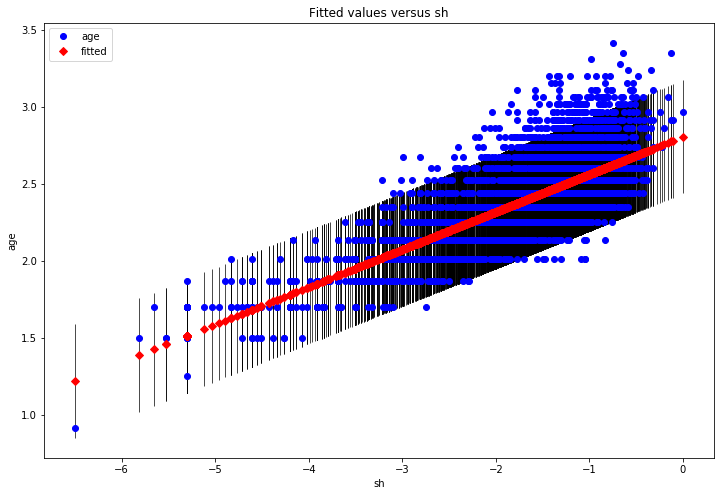

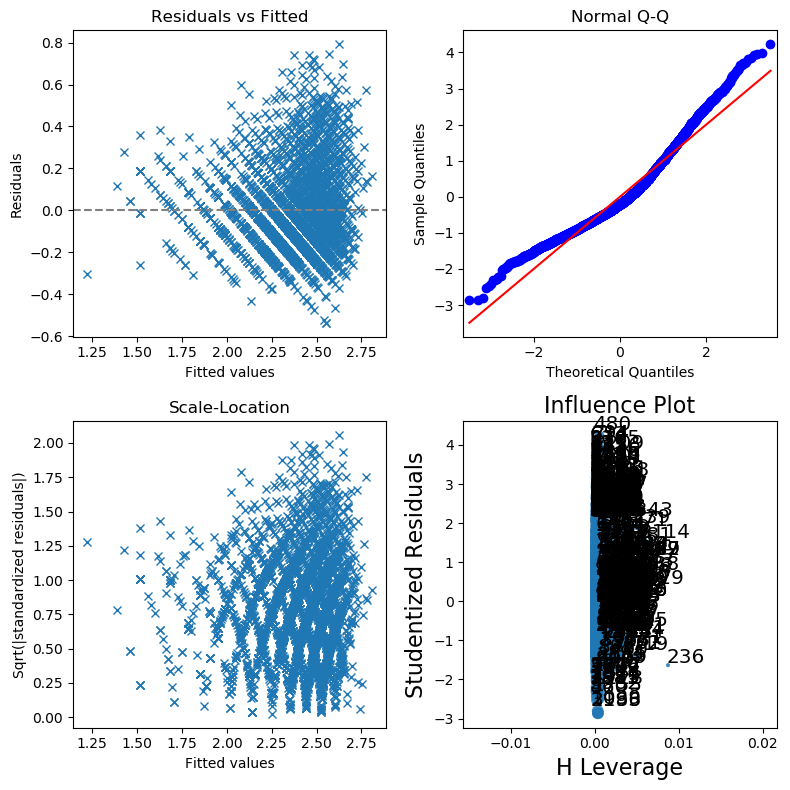

In [46]:
'''
# Problem 2: model using log-transformed attributes 
1. Use `lm()` to fit a regression model of *log-transformed* age as linear function of *log-transformed* 
shell weight and use `summary` to evaluate its results.  
Can we compare fits obtained from using untransformed (above) and log-transformed attributes?  
Can we directly compare RSE from these two models?  What about comparing $R^2$?  
What would we conclude from this? (Please consult ISLR Ch.3.1.3 if unsure)  What would be the physical meaning of model coefficients this time?  
What does model intercept represent in this case, for example?  
How sensible is this and how does it compare to that from the fit on untransformed data?

2. Create a XY-scatterplot of log-transformed predictor and response and add corresponding regression line to it.  
Compared it to the same plot but in untransformed coordinates obtained above.  
What would you conclude from such comparison?

3. Make diagnostic plots for model fit on log-transformed age and shell weight.  
Compare their appearance to that for the model using original scale of measurements. 
What would you conclude from this comparison about their relative quality?
## Solution

'''
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style

dataURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abaDat = pd.read_csv(dataURL,header=None)
abaDat.rename(columns={0:'sex',1:'len',2:'diam',3:'h',4:'ww',5:'sw',6:'vw',7:'sh',8:'rings'}, inplace=True)
abaDat['age'] = abaDat['rings'] + 1.5 

### model log(age) vs log(sh)
x2 = np.log(abaDat["sh"])
y2 = np.log(abaDat["age"])
x2= sm.add_constant(x2);
model_log_age_sh = sm.OLS(y2, x2).fit()
print("Model Summary for lm(log(age)~log(sh)")
print(model_log_age_sh.summary());

### plot the fit. 
fig, ax = plt.subplots(figsize=(12, 8));
fig = sm.graphics.plot_fit(model_log_age_sh, "sh", ax=ax);

### Diagnostic plots .. 

results2 = pd.DataFrame({'resids': model_log_age_sh.resid,
                        'std_resids': model_log_age_sh.resid_pearson,
                        'fitted': model_log_age_sh.predict()})

fig = plt.figure(figsize = (8, 8), dpi = 100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results2['fitted'], results2['resids'],  'x')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

#### qq plot 
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results2['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results2['fitted'], abs(results2['std_resids'])**.5,  'x')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(model_log_age_sh, criterion = 'Cooks', size = 2, ax = ax4)

plt.tight_layout()

# prediction on previously unseen diameters with confidence interval
new_diam2 =np.array([0.1,0.2,0.3])
new_diam2 = sm.add_constant(new_diam2)
predictions_log_sh = model_log_age_sh.get_prediction(new_diam2)
print("Predictions for lm(log(age)~log(sh)")
print(predictions_log_sh.summary_frame(what='all', alpha=0.05));

### need to figure out how to  generate prediction interval.. will tackle that later.


    log(sw)   log(sh)
0 -1.493880 -1.897120
1 -2.307598 -2.659260
2 -1.360627 -1.560648
3 -1.534794 -1.864330
4 -2.413517 -2.900422
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     3177.
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:32:25   Log-Likelihood:                 1435.1
No. Observations:                4177   AIC:                            -2864.
Df Residuals:                    4174   BIC:                            -2845.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

,VIF Factor,features
0,7.8,const
1,11.5,log(sw)
2,11.5,log(sh)


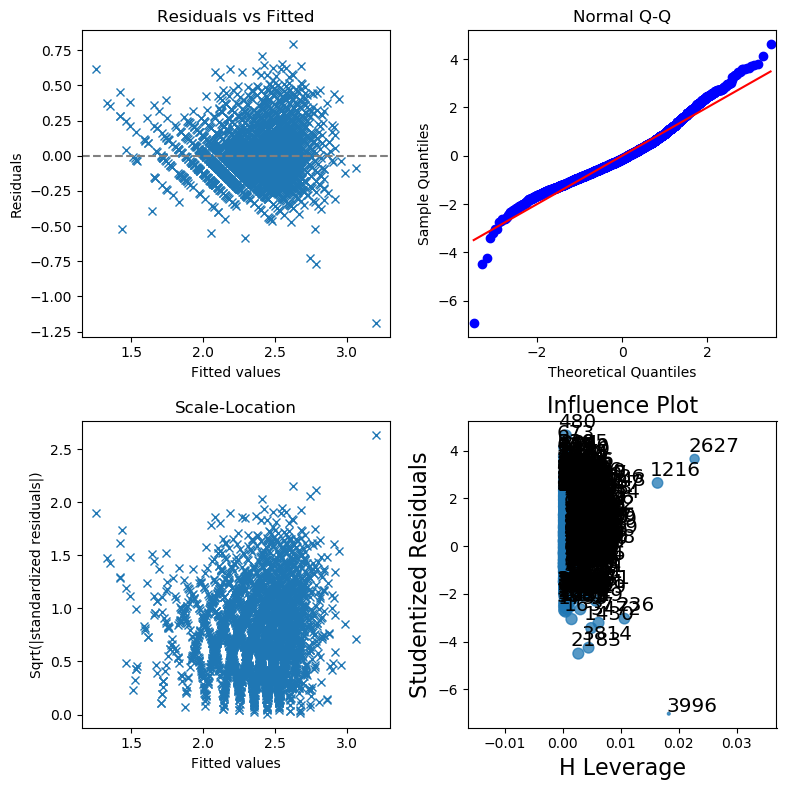

In [45]:
'''
# Problem 3: Adding second variable to the model 
To explore effects of adding another variable to the model, continue using log-transformed attributes
and fit a model of log-transformed age as a function of shell weight and shucked weight (both log-transformed also).
Just an additive model -- no interaction term is necessary at this point. 
Please obtain and evaluate the summary of this model fit, confidence intervals on its parameters and its diagnostic plots. 
Where applicable, compare them to the model obtained above and reflect on pros and cons of including shucked weight as another variable into the model.
## Solution
'''

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.stats.outliers_influence import variance_inflation_factor


dataURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abaDat = pd.read_csv(dataURL,header=None)
abaDat.rename(columns={0:'sex',1:'len',2:'diam',3:'h',4:'ww',5:'sw',6:'vw',7:'sh',8:'rings'}, inplace=True)
abaDat['age'] = abaDat['rings'] + 1.5 



y = np.log(abaDat['age']);
X1 = np.log(abaDat['sw']);
X2 =np.log(abaDat['sh']);
d = {'log(sw)': X1, 'log(sh)':X2}
X =pd.DataFrame(data=d); 
print(X.head());

### fit multiple regression model. 
X = sm.add_constant(X) 
model3 = sm.OLS(y, X).fit()
print(model3.summary());

### Diagnostic plots .. 

results3 = pd.DataFrame({'resids': model3.resid,
                        'std_resids': model3.resid_pearson,
                        'fitted': model3.predict()})

fig = plt.figure(figsize = (8, 8), dpi = 100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results3['fitted'], results3['resids'],  'x')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

#### qq plot 
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results3['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results3['fitted'], abs(results3['std_resids'])**.5,  'x')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(model3, criterion = 'Cooks', size = 2, ax = ax4)

plt.tight_layout()

### compute VIF()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print('VIF for features sh, sw')
vif.round(1)

'''
Addition of (log-transformed) shucked weight to the model illustrates non-trivial choices involved in making this decision: 
on one hand, two-variable model has higher $R^2$, on the other due to collinearity of these attributes, 
the standard error estimate for the slope increased almost three-fold and VIF values are just over the range indicated in ISLR 
as reasonably expected for practically available data.  More disciplined approaches to variable selection are presented in ISLR Chapter 6.
'''
